In [ ]:
!pip install pycaret[full]
!pip install opendatasets
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 47.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. Thi

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
!kaggle datasets download -d arezalo/fruit-classification-simple-dataset
!unzip fruit-classification-simple-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/arezalo/fruit-classification-simple-dataset
License(s): unknown
  0% 0.00/29.1k [00:00<?, ?B/s]
100% 29.1k/29.1k [00:00<00:00, 3.33MB/s]
Archive:  fruit-classification-simple-dataset.zip
  inflating: example_dataset_2.csv   


In [ ]:
import pandas as pd
df = pd.read_csv('example_dataset_2.csv')
df.head()

,x,y,class
0,4.194795,-0.938062,apple
1,8.269129,-4.450061,apple
2,8.451618,3.547347,apple
3,7.127931,-4.404420,apple
4,5.993756,5.669073,apple


In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df, target = 'class', session_id = 123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"apple: 0, banana: 1, orange: 2"
4,Original data shape,"(1500, 3)"
5,Transformed data shape,"(1500, 3)"
6,Transformed train set shape,"(1050, 3)"
7,Transformed test set shape,"(450, 3)"
8,Numeric features,2
9,Preprocess,True


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8581,0.9581,0.8581,0.8617,0.8581,0.7871,0.7887,0.0340
qda,Quadratic Discriminant Analysis,0.8571,0.0000,0.8571,0.8609,0.8571,0.7857,0.7874,0.0300
ridge,Ridge Classifier,0.8552,0.0000,0.8552,0.8590,0.8551,0.7829,0.7846,0.0330
lda,Linear Discriminant Analysis,0.8543,0.0000,0.8543,0.8578,0.8542,0.7814,0.7831,0.0470
lr,Logistic Regression,0.8533,0.0000,0.8533,0.8569,0.8533,0.7800,0.7817,0.6480
rf,Random Forest Classifier,0.8295,0.9374,0.8295,0.8316,0.8296,0.7443,0.7452,0.2280
knn,K Neighbors Classifier,0.8276,0.9257,0.8276,0.8314,0.8275,0.7414,0.7431,0.0790
gbc,Gradient Boosting Classifier,0.8257,0.0000,0.8257,0.8273,0.8255,0.7386,0.7395,0.5260
et,Extra Trees Classifier,0.8257,0.9384,0.8257,0.8276,0.8255,0.7386,0.7396,0.2200
catboost,CatBoost Classifier,0.8257,0.9459,0.8257,0.8282,0.8254,0.7386,0.7400,2.4320


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

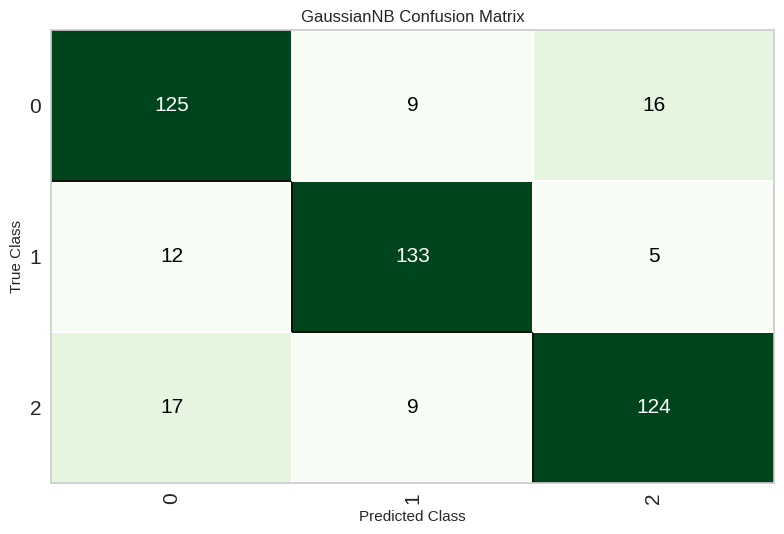

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

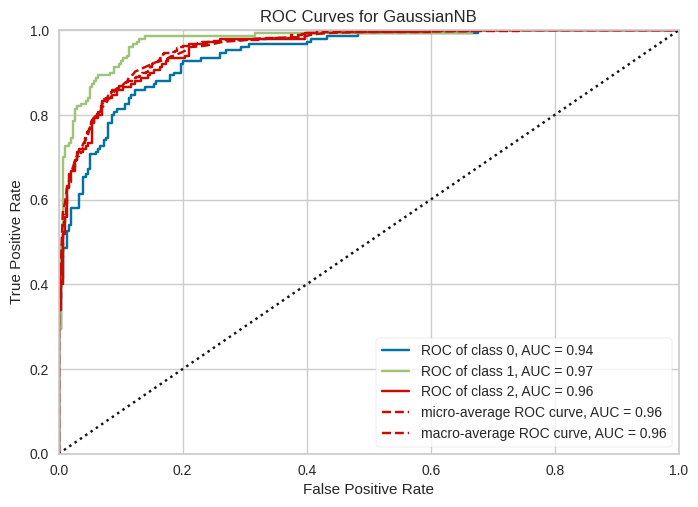

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

In [ ]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8489,0.9574,0.8489,0.8492,0.8489,0.7733,0.7735


In [ ]:
# show predictions df
holdout_pred.head()

,x,y,class,prediction_label,prediction_score
1002,10.052914,10.417701,orange,orange,0.9626
1245,6.723980,8.658746,orange,orange,0.7662
996,-0.675419,3.598333,banana,banana,0.9863
789,6.239423,7.178041,banana,orange,0.5602
340,10.184006,0.496966,apple,apple,0.9594


In [ ]:
# copy data and drop Class variable

new_data = df.copy()
new_data.drop('class', axis=1, inplace=True)
new_data.head()

,x,y
0,4.194795,-0.938062
1,8.269129,-4.450061
2,8.451618,3.547347
3,7.127931,-4.404420
4,5.993756,5.669073


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,x,y,prediction_label,prediction_score
0,4.194796,-0.938062,apple,0.5939
1,8.269129,-4.450061,apple,0.9906
2,8.451618,3.547347,apple,0.7225
3,7.127931,-4.404420,apple,0.9780
4,5.993756,5.669073,banana,0.3842


In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['x', 'y'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['x', 'y'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)